# Deephyper analytics - hyperparameter search study
**path to data file**: /lus/theta-fs0/projects/datascience/wilsonb/theta/deephyper/model1/model1/m1_hps/results.csv

for customization please see: https://matplotlib.org/api/matplotlib_configuration_api.html

## Setup & Data loading

In [1]:
path_to_data_file = '~/DL/deephyper/model1/model1/m1_hps/results.csv'

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from datetime import datetime
from tqdm import tqdm
from IPython.display import display, Markdown

width = 21
height = width/1.618

matplotlib.rcParams.update({
    'font.size': 21,
    'figure.figsize': (width, height), 
    'figure.facecolor': 'white', 
    'savefig.dpi': 72, 
    'figure.subplot.bottom': 0.125, 
    'figure.edgecolor': 'white',
    'xtick.labelsize': 21,
    'ytick.labelsize': 21})

df = pd.read_csv(path_to_data_file)

display(Markdown(f'The search did _{df.count()[0]}_ **evaluations**.'))

df.head()

The search did _10_ **evaluations**.

,activation,batch_size,dropout1,dropout2,dropout3,dropout4,embed_hidden_size,epochs,loss,optimizer,patience,proportion,units,id,objective,elapsed_sec
0,relu,128,0.10,0.05,0.10,0.05,21,150,binary_crossentropy,Adam,12,0.5,10,341b5be8-e347-11eb-a964-f18f9b2aeba1,0.513302,181.933848
1,relu,64,0.10,0.05,0.05,0.05,21,150,binary_crossentropy,AdamW,12,0.5,10,341b5bee-e347-11eb-a964-f18f9b2aeba1,0.486698,233.813179
2,relu,128,0.10,0.10,0.10,0.05,21,75,binary_crossentropy,Adam,12,0.5,10,341b5c04-e347-11eb-a964-f18f9b2aeba1,0.513302,245.262598
3,relu,64,0.10,0.05,0.10,0.05,21,75,binary_crossentropy,Adam,12,0.5,10,341b5c30-e347-11eb-a964-f18f9b2aeba1,0.486698,208.304148
4,relu,128,0.05,0.05,0.05,0.05,21,150,binary_crossentropy,AdamW,12,0.5,10,341b5c86-e347-11eb-a964-f18f9b2aeba1,0.486698,196.713574


## Statistical summary

In [3]:
df.describe()

,batch_size,dropout1,dropout2,dropout3,dropout4,embed_hidden_size,epochs,patience,proportion,units,objective,elapsed_sec
count,10.000000,10.000000,10.000000,10.00000,10.00,10.0,10.000000,10.0,10.0,10.0,10.000000,10.000000
mean,108.800000,0.085000,0.065000,0.08000,0.05,21.0,105.000000,12.0,0.5,10.0,0.508629,218.632293
std,30.914937,0.024152,0.024152,0.02582,0.00,0.0,38.729833,0.0,0.0,0.0,0.029220,20.560800
min,64.000000,0.050000,0.050000,0.05000,0.05,21.0,75.000000,12.0,0.5,10.0,0.486698,181.933848
25%,80.000000,0.062500,0.050000,0.05000,0.05,21.0,75.000000,12.0,0.5,10.0,0.486698,207.387257
50%,128.000000,0.100000,0.050000,0.10000,0.05,21.0,75.000000,12.0,0.5,10.0,0.500000,218.135660
75%,128.000000,0.100000,0.087500,0.10000,0.05,21.0,150.000000,12.0,0.5,10.0,0.513302,236.321018
max,128.000000,0.100000,0.100000,0.10000,0.05,21.0,150.000000,12.0,0.5,10.0,0.574352,245.262598


## Search trajectory

/tmp/ipykernel_28366/1453590847.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 1512x934.487 with 0 Axes>

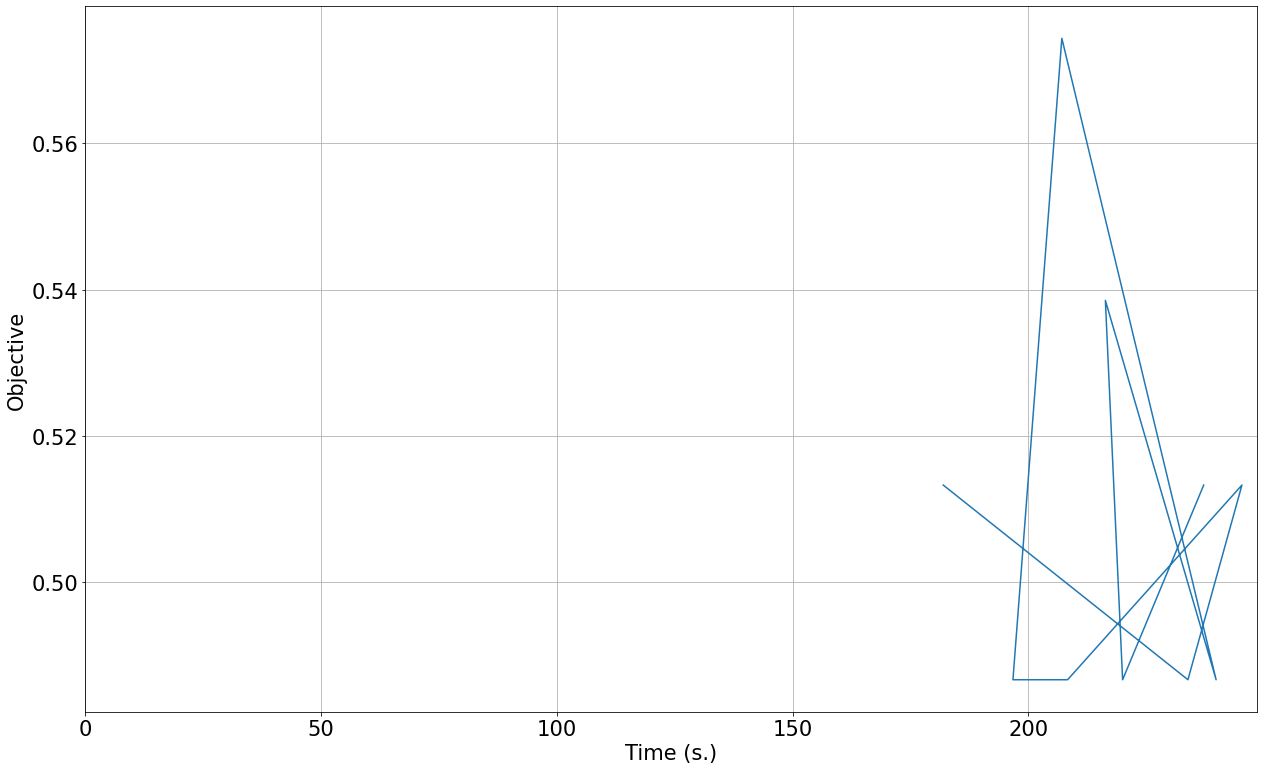

In [4]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.plot(df.elapsed_sec, df.objective)
ax.set_ylabel('Objective')
ax.set_xlabel('Time (s.)')
ax.set_xlim(0)
ax.grid()
fig.show()

## Pairplots

/home/bwilson/dlvenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/bwilson/dlvenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/bwilson/dlvenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/bwilson/dlvenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/bwilson/dlvenv/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


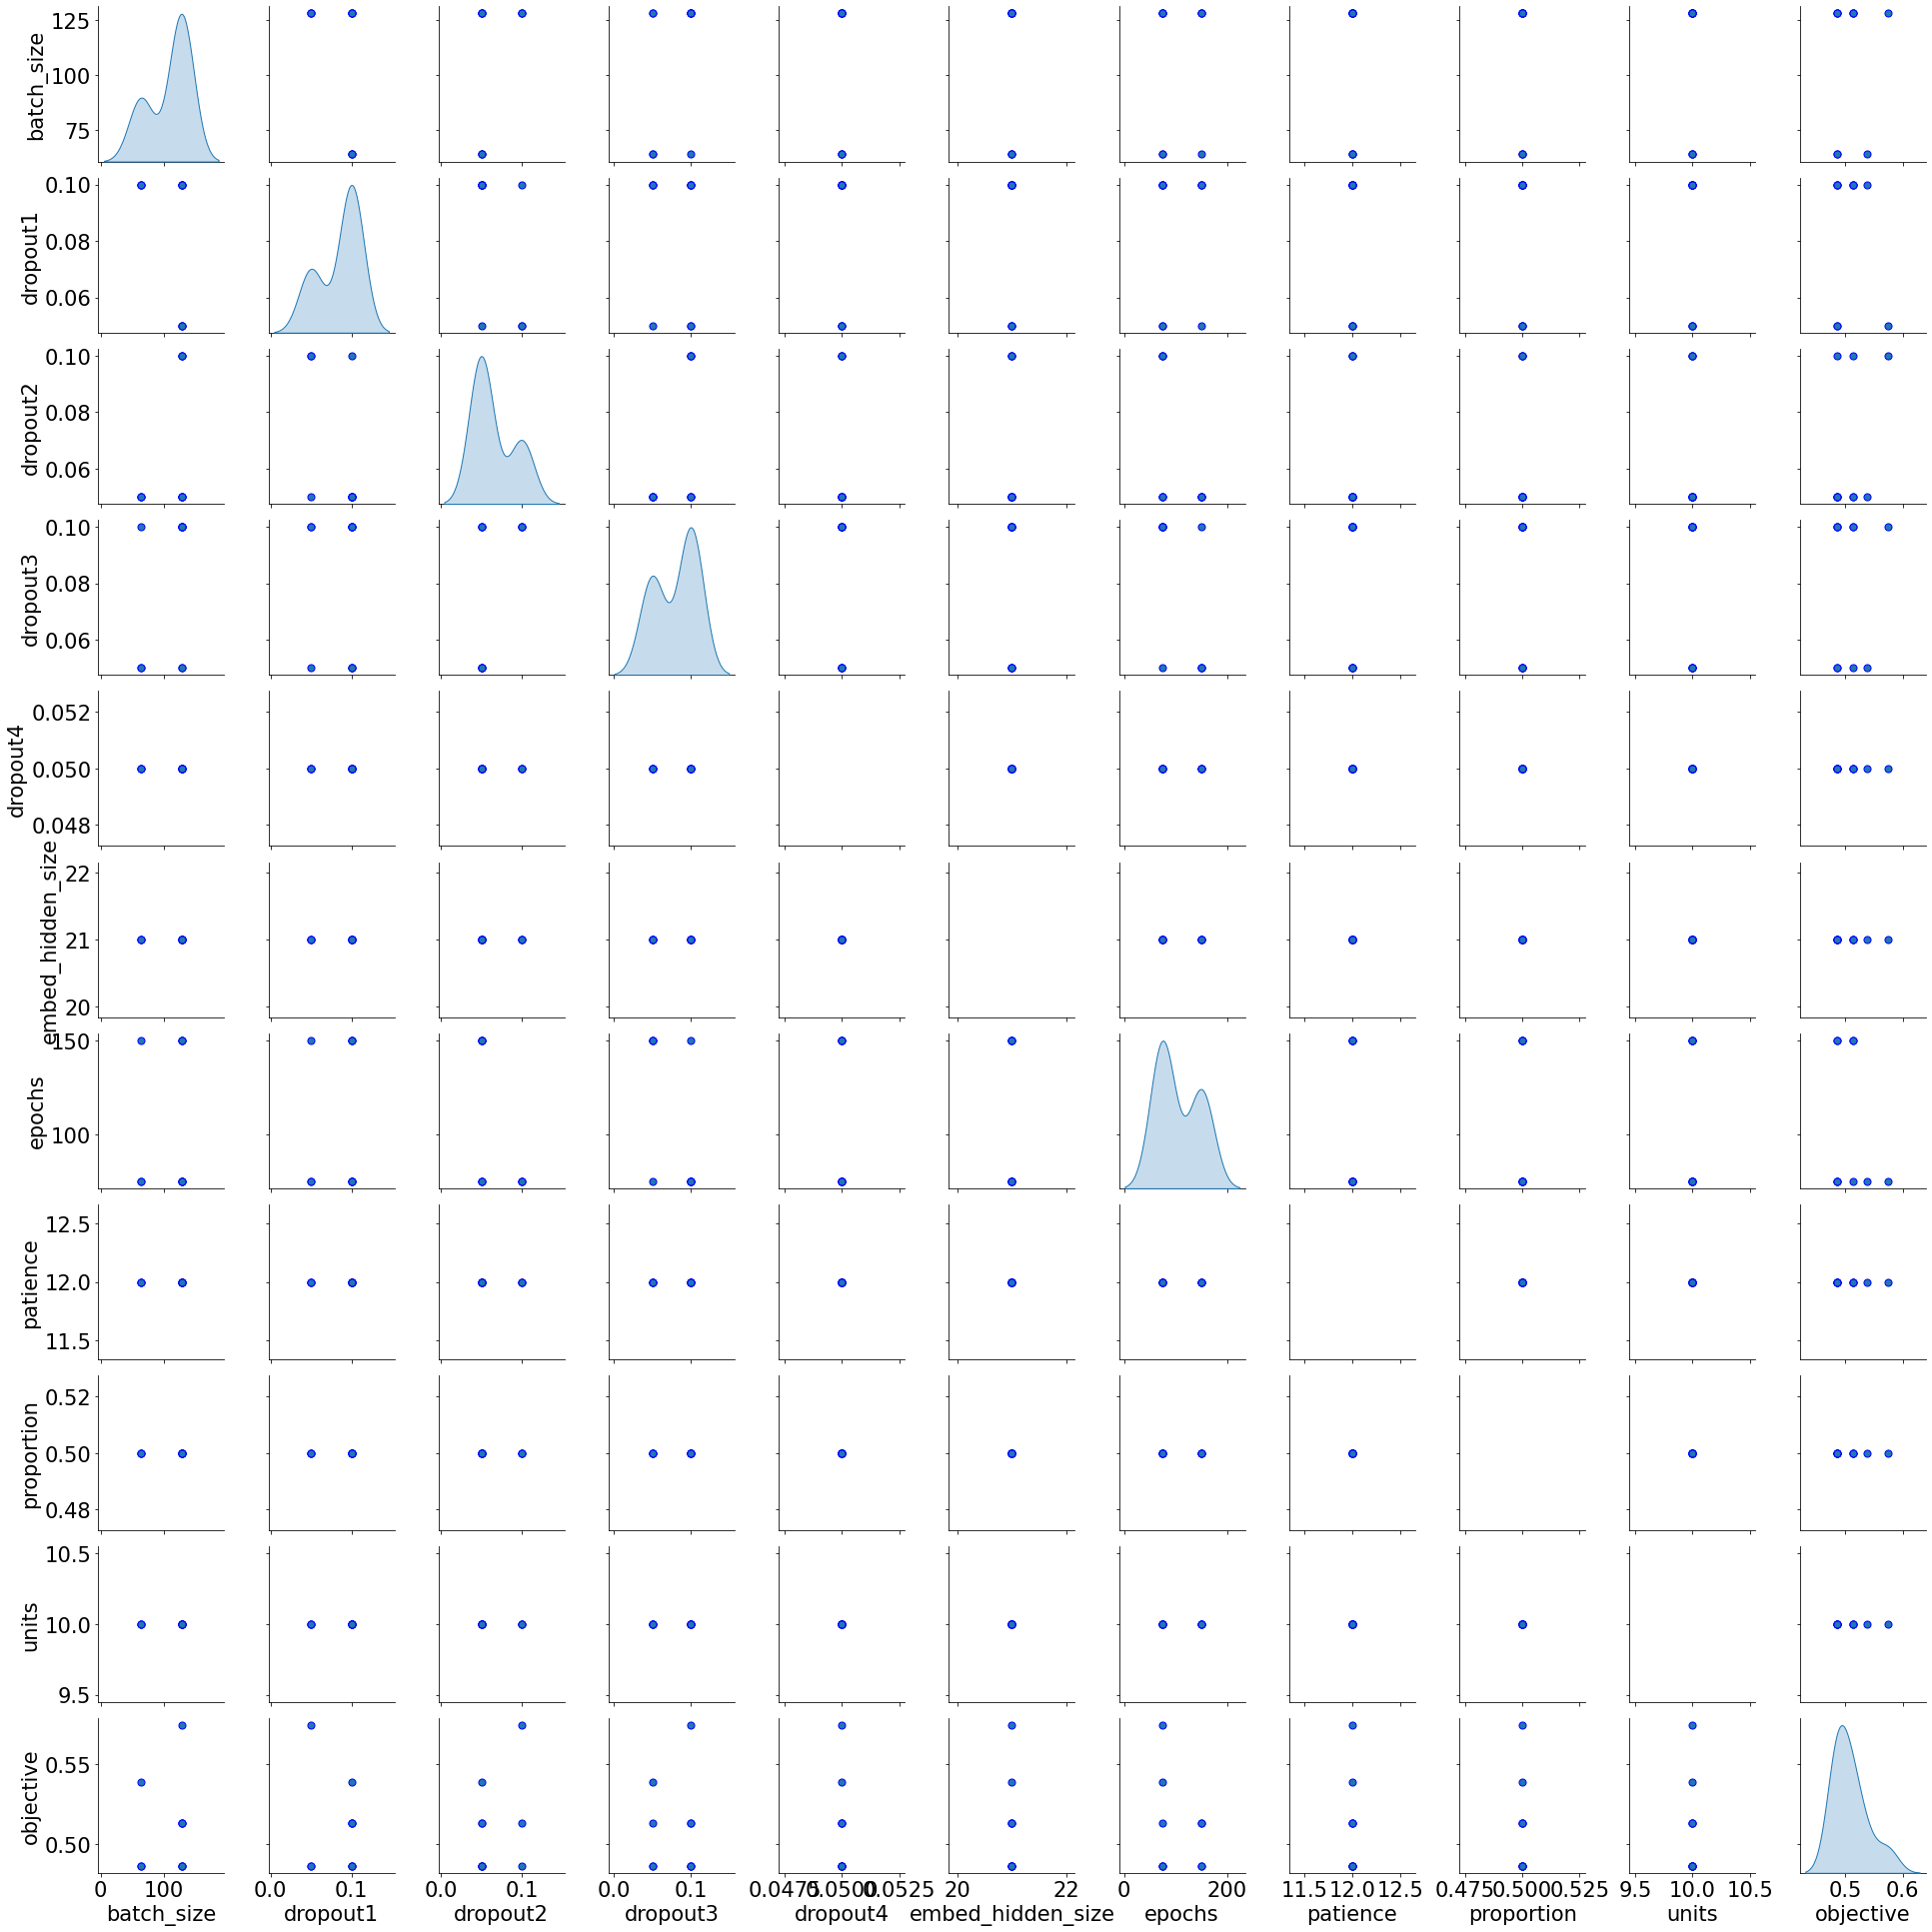

In [5]:
not_include = ['elapsed_sec']
sns.pairplot(df.loc[:, filter(lambda n: n not in not_include, df.columns)],
                diag_kind="kde", markers="o",
                plot_kws=dict(s=50, edgecolor="b", linewidth=1),
                diag_kws=dict(shade=True))
plt.show()

<Figure size 1512x934.487 with 0 Axes>

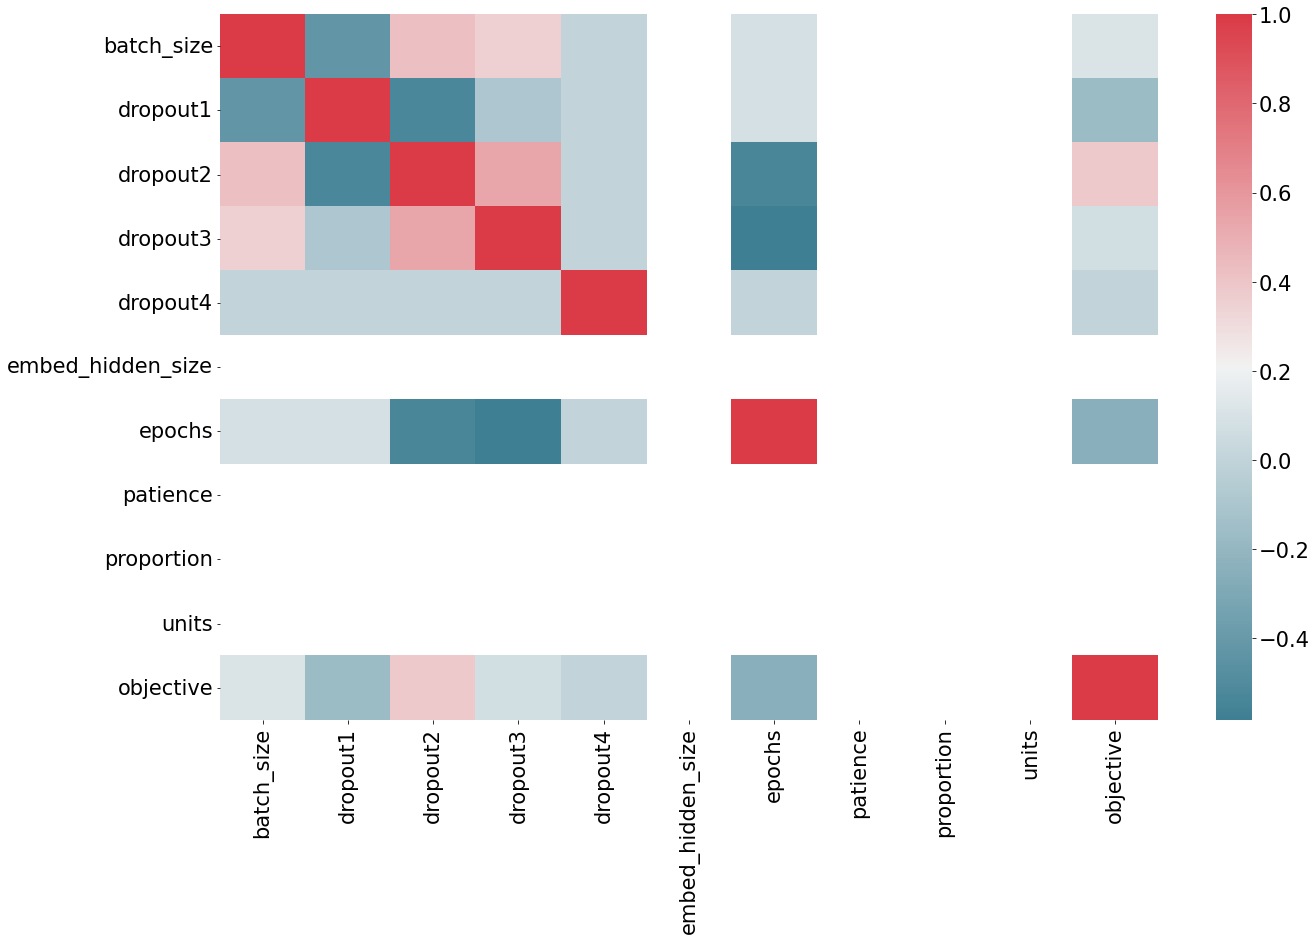

In [6]:
fig = plt.figure()
fig, ax = plt.subplots()
corr = df.loc[:, filter(lambda n: n not in not_include, df.columns)].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True), ax=ax)
ax.set_yticklabels(corr.columns, va='center')
plt.show()

## Best objective

In [7]:
i_max = df.objective.idxmax()
df.iloc[i_max]

activation                                           relu
batch_size                                            128
dropout1                                             0.05
dropout2                                              0.1
dropout3                                              0.1
dropout4                                             0.05
embed_hidden_size                                      21
epochs                                                 75
loss                                  binary_crossentropy
optimizer                                            Adam
patience                                               12
proportion                                            0.5
units                                                  10
id                   341b5cc0-e347-11eb-a964-f18f9b2aeba1
objective                                        0.574352
elapsed_sec                                       207.082
Name: 5, dtype: object

In [8]:
dict(df.iloc[i_max])

{'activation': 'relu',
 'batch_size': 128,
 'dropout1': 0.05,
 'dropout2': 0.1,
 'dropout3': 0.1,
 'dropout4': 0.05,
 'embed_hidden_size': 21,
 'epochs': 75,
 'loss': 'binary_crossentropy',
 'optimizer': 'Adam',
 'patience': 12,
 'proportion': 0.5,
 'units': 10,
 'id': '341b5cc0-e347-11eb-a964-f18f9b2aeba1',
 'objective': 0.5743519781718963,
 'elapsed_sec': 207.08162665367126}